<a href="https://colab.research.google.com/github/mpilomthiyane97/Mpilo/blob/main/Prompt_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 48.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 56.4 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.0
    Uninstalling matplotlib-3.10.0:
      Successfully uninstalled matplotlib-3.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
OpenAI API key loaded successfully from Colab Secrets.

--- Basic Prompts - Simple Explanation ---
Prompt:
Explain Python in simple terms.

Response:
Python is a popular prog

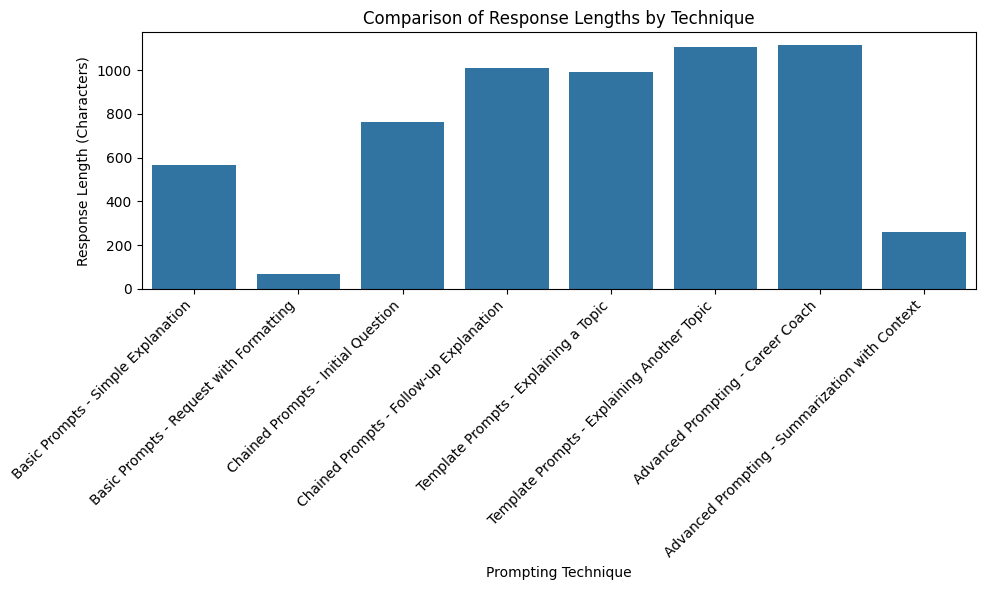


--- Detailed Experiment Logs with Observations ---

--- Experiment 1 ---
Technique: Basic Prompts - Simple Explanation
Prompt:
Explain Python in simple terms.

Response:
Python is a popular programming language that is known for its simplicity and readability. It is widely used for tasks such as web development, data analysis, artificial intelligence, and more. Python uses a straightforward syntax that is easy for beginners to learn, making it a great choice for those new to programming. It also has a large community of users who contribute to a vast library of resources and modules that can be used to extend its capabilities. Overall, Python is a versatile and powerful language that can be used for a wide range of applications.

Observations:
good

--- Experiment 2 ---
Technique: Basic Prompts - Request with Formatting
Prompt:
List three key features of the Python programming language using bullet points.

Response:
- Easy-to-read syntax
- Dynamic typing
- Extensive standard library


In [ ]:
#Prompt Lab for LLM Experiments

#Install dependencies 
!pip install openai transformers matplotlib pandas seaborn --upgrade

# ✅ Setup: Import libraries and set up API key securely
import openai
from google.colab import userdata
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

try:
    openai.api_key = userdata.get('OPENAI_API_KEY')
    print("✅ OpenAI API key loaded successfully from Colab Secrets.")
except KeyError:
    print("❌ Error: OpenAI API key not found. Please set it in Colab Secrets.")
    openai.api_key = None

MODEL = "gpt-3.5-turbo"  

# Run and log LLM experiments
def run_experiment(technique, prompt, max_tokens=100):
    if openai.api_key:
        response = openai.chat.completions.create(
            model=MODEL,
            messages=[{"role": "user", "content": prompt}],
            max_tokens=max_tokens
        )
        response_text = response.choices[0].message.content.strip()
        print(f"\n🔬 Technique: {technique}")
        print("📤 Prompt:\n", prompt)
        print("\n🤖 Response:\n", response_text)

        # Log your own observation
        observations = input("💭 What did you observe in this experiment? ")
        return {
            "Technique": technique,
            "Prompt": prompt,
            "Response": response_text,
            "Observations": observations
        }
    else:
        print(f"⚠️ Skipping experiment: {technique} (API key not set)")
        return None

#Collect all results
experiment_logs = []

# ------------------------------------------
# Section 1: Basic Prompts
# ------------------------------------------

experiment_logs += [exp for exp in [
    run_experiment(
        "Basic Prompts - Simple Explanation",
        "Explain Python in simple terms.",
        max_tokens=150
    ),
    run_experiment(
        "Basic Prompts - Request with Formatting",
        "List three key features of the Python programming language using bullet points.",
        max_tokens=200
    )
] if exp]

# ------------------------------------------
# Section 2: Chained Prompts
# ------------------------------------------

prompt1 = "What are the benefits of React?"
exp1 = run_experiment("Chained Prompts - Initial Question", prompt1, max_tokens=150)
if exp1:
    experiment_logs.append(exp1)
    followup_prompt = f"Explain each of the following benefits of React with a short example: {exp1['Response']}"
    exp2 = run_experiment("Chained Prompts - Follow-up Explanation", followup_prompt, max_tokens=250)
    if exp2:
        experiment_logs.append(exp2)

# ------------------------------------------
#Section 3: Template Prompts
# ------------------------------------------

for topic in ["Machine Learning", "Quantum Computing"]:
    exp = run_experiment(f"Template Prompts - Explaining {topic}", f"Explain {topic} to a beginner.", max_tokens=200)
    if exp:
        experiment_logs.append(exp)

# ------------------------------------------
# Section 4: Advanced Prompting
# ------------------------------------------

experiment_logs += [exp for exp in [
    run_experiment(
        "Advanced Prompting - Career Coach",
        "Act as a career coach. I want to become a software engineer. What are the first three essential steps I should take?",
        max_tokens=250
    ),
    run_experiment(
        "Advanced Prompting - Summarization with Context",
        "Summarize the following news article in two sentences:\n"
        "'The latest report indicates a significant increase in renewable energy adoption globally. "
        "Solar and wind power saw the largest growth, driven by decreasing costs and supportive government policies. "
        "However, challenges remain in grid infrastructure and energy storage solutions.'",
        max_tokens=100
    )
] if exp]

# ------------------------------------------
# Section 5: Review and Visualization
# ------------------------------------------

if experiment_logs:
    #Create DataFrame
    df_logs = pd.DataFrame(experiment_logs)
    print("\n📄 Experiment Log DataFrame")
    print(df_logs)

    #Visualize response lengths
    df_logs["Response Length"] = df_logs["Response"].apply(len)
    plt.figure(figsize=(10, 6))
    sns.barplot(x="Technique", y="Response Length", data=df_logs)
    plt.xticks(rotation=45, ha='right')
    plt.xlabel("Prompting Technique")
    plt.ylabel("Response Length (Characters)")
    plt.title("📊 Response Length by Technique")
    plt.tight_layout()
    plt.show()

    #Print all logs with observations
    print("\n📚 Detailed Experiment Logs:")
    for i, row in df_logs.iterrows():
        print(f"\n--- Experiment {i + 1} ---")
        print(f"🔖 Technique: {row['Technique']}")
        print("🧠 Prompt:\n", row['Prompt'])
        print("💬 Response:\n", row['Response'])
        print("📝 Observations:\n", row['Observations'])
else:
    print("\n⚠️ No experiments were logged. Please re-run the cells above.")

# ------------------------------------------
# Next Steps
# ------------------------------------------

# - Review prompt strategies that worked well
# - Note down key patterns and tactics
# - Try modifying high-performing prompts for new contexts
# - Apply findings to your own AI tools or projects
